In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(color_codes=True)


### 3.1. 可视化单变量的分布

**(a) 直方图函数distplot()**

`distplot()`接口：

>distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, ver
tical=False, norm_hist=False, axlabel=None, label=None, ax=None)

默认绘制单变量的直方图和核密度估计kernel density estimat(KDE);

/Users/mac/.venvs/spider/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


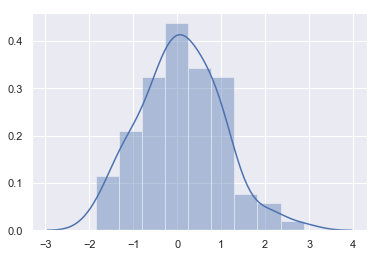

In [3]:
x = np.random.normal(size=100)
sns.distplot(x)

**(a).1. 直方图histogram介绍**

`distplot()`函数可以去除KDE曲线，加上地毯图rug plot，操作方法见参数，效果如下：

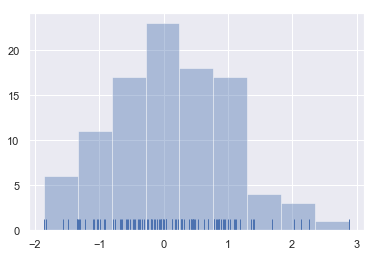

In [4]:
sns.distplot(x, kde=False, rug=True)

`distplot()`函数可以设置分箱数目；

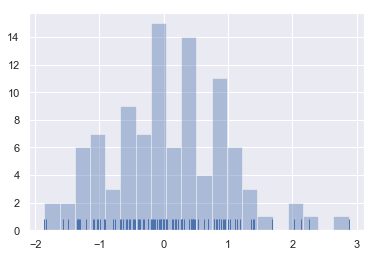

In [5]:
sns.distplot(x, bins=20, kde=False, rug=True)

**(a).2. 核密度估计介绍**

`distplot()`函数可以去除直方图histogram，加上地毯图rug plot，操作方法见参数，效果如下：

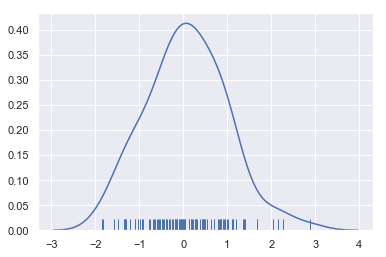

In [6]:
sns.distplot(x, hist=False, rug=True)

绘制kde过程：

1. 变量每个观察值 ---> 以观察值为中心的正态（ 高斯）曲线；
2. 求和所有高斯曲线得到每个观察值（点）处的密度；
3. 归一化求和后的曲线，使得曲线下方面积为1；


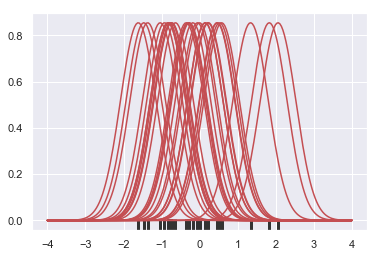

In [10]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")
    
sns.rugplot(x, color=".2", linewidth=3)

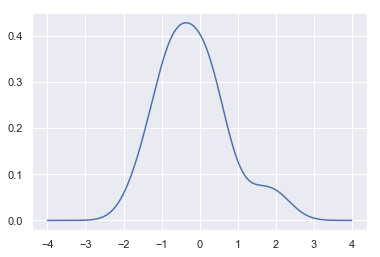

In [12]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density)

使用`rugplot()`函数接口和`kdeplot()`函数接口，能够更直接地绘制地毯图和核密度估计曲线：

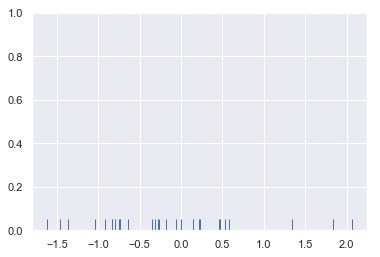

In [13]:
sns.rugplot(x)

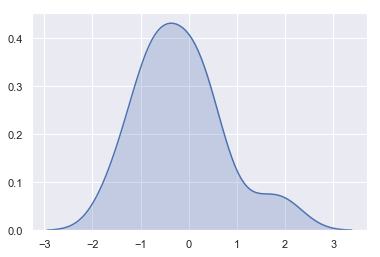

In [14]:
sns.kdeplot(x, shade=True)

**KDE的带宽bandwidth（bw）参数控制估计对数据的拟合程度，与直方图中的bin(数据切分数量参数)大小非常相似。** 它对应于我们上面绘制的内核(每一条gauss曲线)的宽度(**带宽**)。 默认中会尝试使用通用引用规则猜测一个适合的值，但尝试更大或更小的值可能会有所帮助：

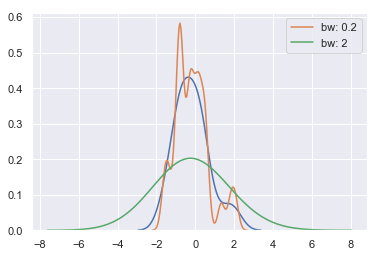

In [15]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend()

As you can see above, the nature of the Gaussian KDE process means that estimation extends past the largest and smallest values in the dataset. It’s possible to control how far past the extreme values the curve is drawn with the cut parameter; however, this only influences how the curve is drawn and not how it is fit:

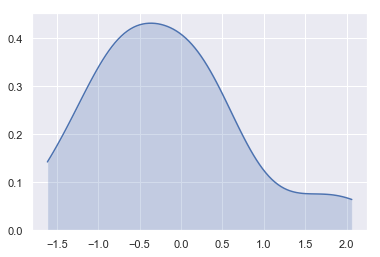

In [16]:
sns.kdeplot(x, shade=True, cut=0)

**(a).3. 拟合总体分布**

`displot()`函数还可以将总体分布（真实分布）拟合到数据集分布（样本分布）图中：

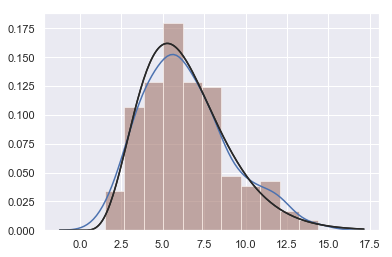

In [18]:
x = np.random.gamma(6, size=200)
sns.distplot(x, fit=stats.gamma)

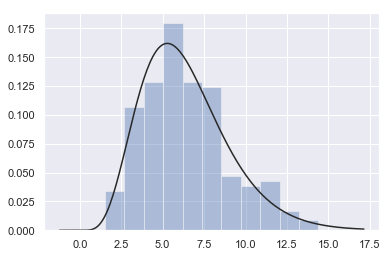

In [19]:
sns.distplot(x, kde=False, fit=stats.gamma)

### 3.2. 可视化双变量的分布

**(a) 联合分布函数jointplot()**

`jointplot()`函数接口

>seaborn.jointplot = jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)

绘制两个变量的联合分布图，以及每个变量的边缘分布图；


In [31]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]  # 联合高斯分布的均值和协方差矩阵
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

print('>> df =', df, sep='\n')

>> df =
            x         y
0    0.349446  1.481505
1   -0.465808  1.322348
2   -0.063082  0.734460
3    0.688732  1.398953
4    1.418466  2.873974
5   -0.409805  1.440682
6   -1.146160  0.907796
7   -0.179660  0.560761
8   -0.753273  0.110376
9   -0.737586  1.168109
10   1.103900  2.100101
11   0.269712  1.267042
12   0.679437  0.161343
13  -0.396374  0.689473
14  -0.202848  0.676223
15  -2.274690 -0.137111
16  -3.002962  0.115314
17  -1.376101  0.286681
18   0.670351  0.755335
19   0.326244  3.577895
20  -1.798572 -0.462666
21  -1.886365  0.980887
22   0.794512  1.231632
23  -0.440195  1.149855
24  -0.321263  0.021774
25  -0.880279  0.898472
26  -1.542738 -0.806986
27  -0.164434  1.019348
28  -0.853799  1.505237
29   0.290858  2.355831
..        ...       ...
170  0.504886 -0.285731
171 -1.778028 -1.233279
172 -1.501177  0.272370
173 -1.652816 -0.773575
174  0.357222  1.029188
175 -0.371396  1.517696
176  0.172727  1.087026
177 -1.267331 -0.380653
178  0.165125  0.461991
179 -0.4

**(a).1. 散点图介绍scatterplot**

双变量分布的散点图 类似于 单变量分布的地毯图；

可以调用`matplotlib.pyplot`中`plt.scatter`函数来绘制散点图；也可以使用`jointplot()`来绘制散点图；

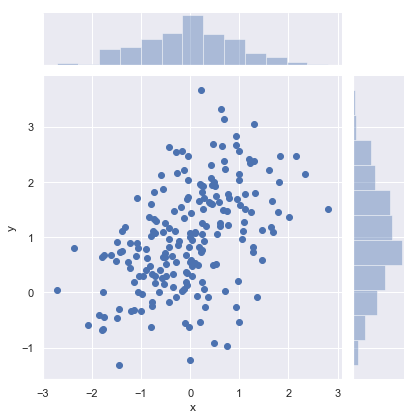

In [22]:
sns.jointplot(x="x", y="y", data=df)

**(a).2. 六边形箱图介绍hexbin plot**

**双变量分布的hexbin图 类似于 单变量分布的直方图；**，hexbin图显示了落在六边形仓内的观测数，适用于大数据集，最好使用白色背景；

**可以调用matplotlib.pyplot中plt.hexbin函数来绘制hexbin图；也可以使用jointplot()来绘制hexbin图；**


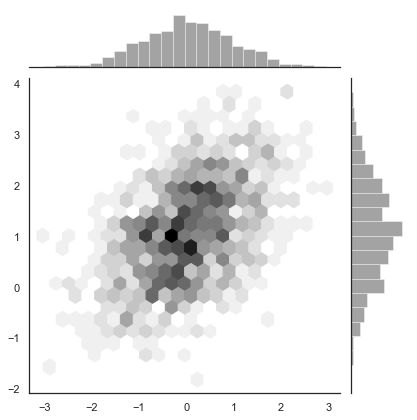

In [23]:
x, y = np.random.multivariate_normal(mean, cov, size=1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k")

**(a).3. 联合核密度估计介绍（双变量情况下）**


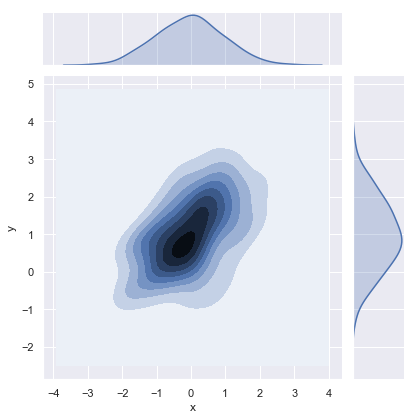

In [24]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

You can also draw a two-dimensional kernel density plot with the `kdeplot()` function. This allows you to draw this kind of plot onto a specific (and **possibly already existing**) matplotlib axes, whereas the jointplot() function manages its own figure:

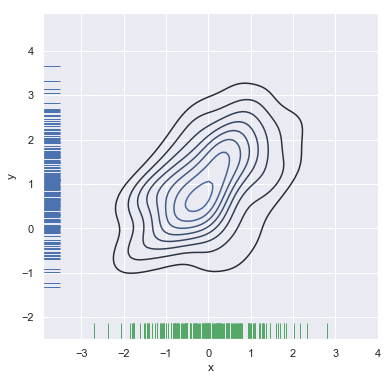

In [25]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax)

如果是希望更连续地显示双变量密度，您可以简单地增加n_levels参数增加轮廓级数：

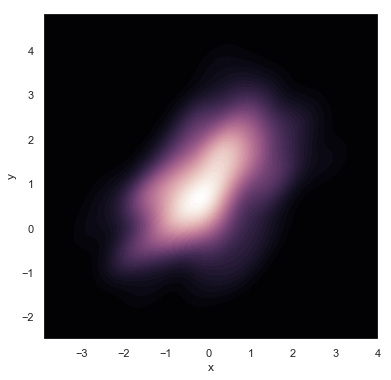

In [26]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

**(a).4. jointplot()返回值介绍--JointGrid类**

`jointplot()`函数返回一个`JointGrid`类的实例，该返回值可以进一步定制jointplot图的输出；

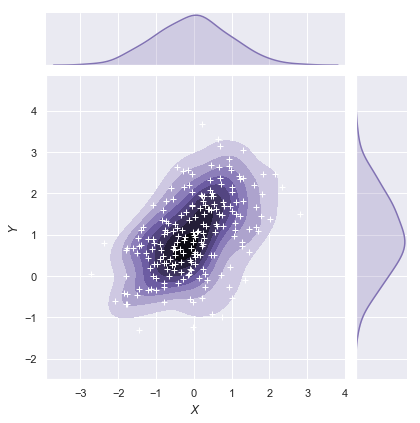

In [27]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")  # LaTex公式来设置图像label

### 3.2. 可视化数据集中的成对关系

**(a) pariplot()函数**

`pairplot()` 函数接口：

>pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
绘制数据集中多个成对的双变量联合分布（对角线上是单变量的分布）

**(a).1. 散点图矩阵**

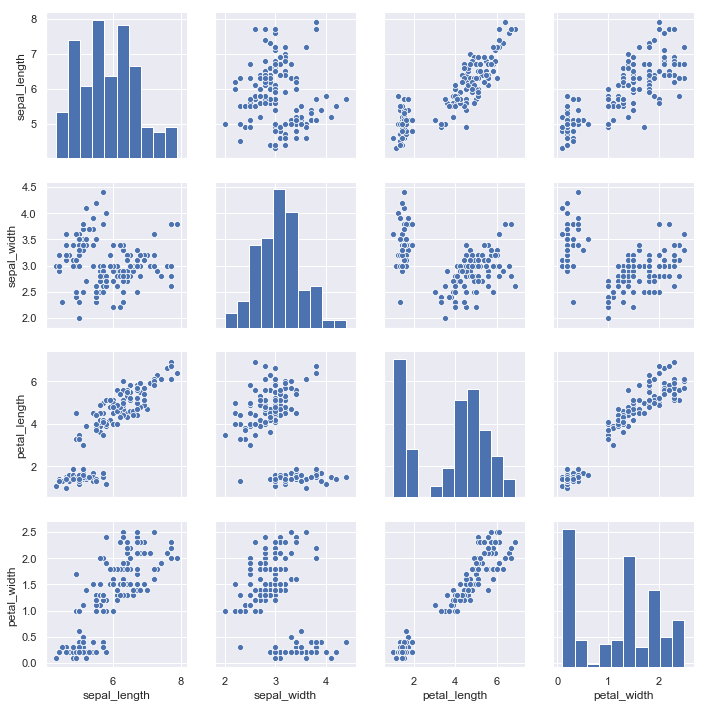

In [28]:
iris = sns.load_dataset("iris")
sns.pairplot(iris)

**(a).2. pairplot()返回值介绍--PairGrid类**

`pairplot()`函数返回一个`PairGrid`类的实例，该返回值可以进一步定制pairplot图的输出；

**(a).3. 核密度图矩阵**

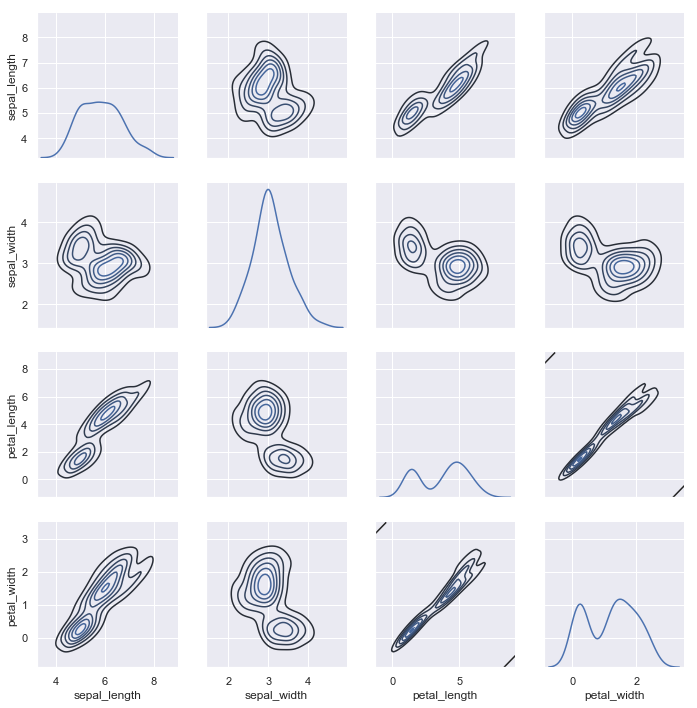

In [29]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)